In [1]:
# Basic imports 
import matplotlib.pyplot as plt
import numpy as np
import pydot
from scipy import stats

# NN 
import tensorflow as tf
import keras

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = "montannacolburn"
os.environ['KAGGLE_KEY'] = "007de37d44c536ab92fd8332caafe4c5"
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 84.7MB/s]
 96% 261M/271M [00:01<00:00, 117MB/s]
100% 271M/271M [00:01<00:00, 157MB/s]
 99% 538M/543M [00:05<00:00, 121MB/s]
100% 543M/543M [00:05<00:00, 111MB/s]


In [4]:
cd /content

/content


In [5]:
ls

drive/  sample_data/  sampleSubmission.csv  test1.zip  train.zip


In [6]:
#unzip into new directory 

!unzip \*.zip > /content/unzip_train1


2 archives were successfully processed.


In [7]:
import pandas as pd
filenames = os.listdir("/content/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('d')
    else:
        categories.append('c')
        
        
df = pd.DataFrame({'filename':filenames,
                  'category':categories})

df.head()

,category,filename
0,c,cat.11639.jpg
1,d,dog.7247.jpg
2,c,cat.7792.jpg
3,c,cat.10973.jpg
4,c,cat.11628.jpg


In [8]:
import pandas as pd
filenames = os.listdir("/content/test1/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('d')
    else:
        categories.append('c')
        
        
df_test = pd.DataFrame({'filename':filenames,
                  'category':categories})

df_test.head()

,category,filename
0,c,10622.jpg
1,c,7622.jpg
2,c,3620.jpg
3,c,2741.jpg
4,c,9951.jpg


In [0]:
image_width = 50
image_height = 50
image_size = (image_width, image_height)
image_channel = 3 # RGB color

In [10]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=((image_width,image_height,image_channel))))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(units=1,activation='softmax'))
model.summary()

# Compile the model to put it all together.
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 67713     
Total params: 87,969
Trainable params: 87,969
Non-trainable params: 0
_________________________________________________________________


In [0]:
df = df.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=15
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    df, "/content/train/",
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='binary',
    batch_size=batch_size
)

Found 25000 images belonging to 2 classes.


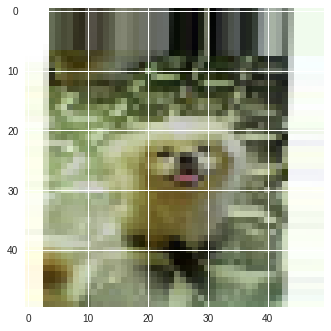

In [15]:
x , y  = train_generator.next()
for i in range(0,1):
    random_image = x[i]
    plt.imshow(random_image)
    plt.show()

In [16]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "/content/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 images.


In [17]:
type(batch_size)

int

In [18]:
train_generator.batch_size

15

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [20]:
STEP_SIZE_TRAIN

1666

In [0]:
total_train = df.shape[0]
total_validate = df_test.shape[0]
batch_size=15

In [22]:
epochs = 3
history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_train/batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=total_validate/batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
1666/1666 [============================>.] - ETA: 0s - loss: 7.9690 - acc: 0.5001

ValueError: ignored